<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 2</b><br><br>

  Hi Erik, I’m <b>Victor Camargo</b> (https://hub.tripleten.com/u/e9cc9c11). Thanks for addressing all previous issues — your project is now approved.

  <b>Nice work on:</b><br>
  ✔️ Preprocessing the data effectively with one-hot encoding and proper scaling after splitting<br>
  ✔️ Creating a separate test set for final evaluation<br>
  ✔️ Training and comparing models, and enhancing the best one with class weighting<br>
  ✔️ Implementing a threshold tuning function to boost recall and optimize F1 score<br>
  ✔️ Including insightful visualizations such as F1-vs-threshold, confusion matrix, ROC curve, and feature importance<br>
  ✔️ Updating the report to match the implemented code and reflecting final test set metrics<br><br>

  ⚠️ <b>Just a quick note</b>: in your conclusion, you reported the F1 score for class <code>0</code> (0.89). The correct metric to compare against the project requirement is the F1 score for class <code>1</code>, which is <b>0.61</b> based on your final test set results.<br><br>

  Overall, great work — well done applying the feedback and producing a clean, well-documented project.
</div>


<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Erik, I’m <b>Victor Camargo</b> (https://hub.tripleten.com/u/e9cc9c11). I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work!

  <b>Nice work on:</b><br>
  ✔️ Preprocessing the data effectively with one-hot encoding and feature scaling<br>
  ✔️ Training a baseline Random Forest model and enhancing it with class weights<br>
  ✔️ Implementing a threshold tuning function to boost recall and optimize F1 score<br>
  ✔️ Including insightful visualizations such as F1-vs-threshold, confusion matrix, ROC curve, and feature importance<br>
  ✔️ Summarizing your results and business insights clearly in the report<br><br>

  A few things still need your attention before approval:<br>
  🔴 You performed scaling before splitting the data, which introduces data leakage. Make sure to split the data first and then scale using only the training set.<br>
  🔴 Your data is currently split into only training and validation sets. It's best practice to create a third, untouched test set using <code>train_test_split()</code> twice.<br>
  🔴 The final F1 score must be reported using the <b>test set</b>, not the validation set. Apply your best model and tuned threshold to the test set and update your final metrics accordingly.<br>
  🔴 If the F1 score on the test set falls below <code>0.59</code>, try applying upsampling techniques to improve performance.<br>
  🔴 Your report mentions a <code>Decision Tree</code> model that was not included in the code. Either add the model or remove it from the results and rewrite the table and insights to reflect what was actually implemented.<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>

  Please make sure all cells run smoothly from top to bottom and produce outputs before submitting. Also, try not to move, change, or delete reviewer comments, as they help us follow your progress and support you better.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.model_selection import train_test_split

In [2]:
# Load and Inspect Data
data = pd.read_csv("/datasets/Churn.csv")
print("Initial data shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nClass distribution:\n", data["Exited"].value_counts(normalize=True))

Initial data shape: (10000, 14)

Missing values:
 RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Class distribution:
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [3]:
# Display basic info
print("Initial data shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum())
print("\nClass distribution:\n", data["Exited"].value_counts(normalize=True))

Initial data shape: (10000, 14)

Missing values:
 RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Class distribution:
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [4]:
# Drop Irrelevant Columns
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [5]:
# One-Hot Encode Categorical Features
data = pd.get_dummies(data, columns=["Geography", "Gender"], drop_first=True)

In [6]:
# Separate Features and Target
target = data["Exited"]
features = data.drop("Exited", axis=1)

In [7]:
# Three-Way Data Split
X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.2, stratify=target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [8]:
# Clean and Scale Data
def clean_and_scale(X_train, X_val, X_test):
    X_train_clean = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
    X_val_clean = X_val.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())
    X_test_clean = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())

    numerical_cols = X_train_clean.select_dtypes(include=["int64", "float64"]).columns
    scaler = StandardScaler()
    X_train_clean[numerical_cols] = scaler.fit_transform(X_train_clean[numerical_cols])
    X_val_clean[numerical_cols] = scaler.transform(X_val_clean[numerical_cols])
    X_test_clean[numerical_cols] = scaler.transform(X_test_clean[numerical_cols])

    return X_train_clean, X_val_clean, X_test_clean

X_train_clean, X_val_clean, X_test_clean = clean_and_scale(X_train, X_val, X_test)

*Removes identifiers that don’t help prediction (RowNumber, CustomerId, Surname)

*Encodes categorical variables (Geography, Gender) using one-hot encoding

*Scales numerical features to help models like logistic regression or SVM

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job preparing the dataset for modeling. You've:
  <ul>
    <li>Removed identifiers like <code>RowNumber</code>, <code>CustomerId</code>, and <code>Surname</code>, which don’t contribute to predictions and can introduce noise.</li>
    <li>Applied one-hot encoding to categorical features like <code>Geography</code> and <code>Gender</code>, using <code>drop_first=True</code> to avoid multicollinearity.</li>
  </ul>

In [9]:
# Check class distribution
class_counts = target.value_counts()
class_proportions = target.value_counts(normalize=True)

print("Class counts:\n", class_counts)
print("\nClass proportions:\n", class_proportions)

Class counts:
 0    7963
1    2037
Name: Exited, dtype: int64

Class proportions:
 0    0.7963
1    0.2037
Name: Exited, dtype: float64


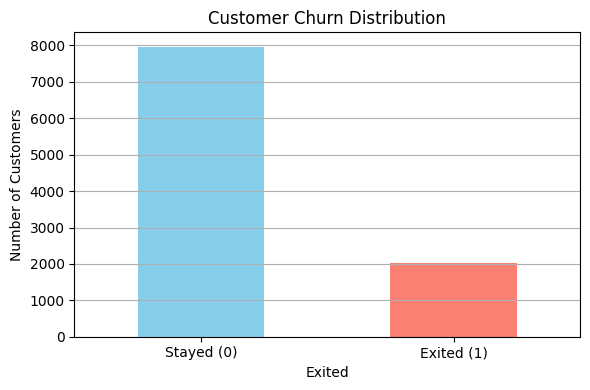

In [10]:
# Visualize class balance
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Customer Churn Distribution")
plt.xlabel("Exited")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['Stayed (0)', 'Exited (1)'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

*If the majority of customers are labeled 0 (stayed), and only a small portion are 1 (exited), then we have a class imbalance.

*This imbalance can hurt model performance—especially recall for the minority class.

*Class imbalance can negatively affect recall because models tend to favor the majority class during training. This bias can lead to fewer correct predictions for the minority class—in this case, churned customers—resulting in missed detections and lower recall scores.

*Since most customers in the dataset did not churn, the model may learn to predict the majority class more often to optimize overall accuracy. However, this comes at the cost of recall for the minority class, which is critical in churn prediction where identifying potential churners is the main goal.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent job identifying and visualizing the class imbalance. You've:
  <ul>
    <li>Printed both the absolute counts and normalized proportions of each class in the target variable.</li>
    <li>Used a clean and readable bar chart to visualize the distribution of customers who stayed vs. exited.</li>
    <li>Included clear axis labels and titles in your plot, which helps make your insights easier to interpret.</li>
  </ul>



In [11]:
# Train Random Forest with Class Weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_clean, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [12]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_clean, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [13]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_clean, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Threshold Tuning Function
def tune_threshold(y_true, y_probs, thresholds=np.arange(0.1, 0.9, 0.01)):
    best_f1 = 0
    best_thresh = 0
    f1_scores = []
    for thresh in thresholds:
        y_pred = (y_probs >= thresh).astype(int)
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh, f1_scores

In [15]:
# Tune Threshold on Validation Set
y_probs_val = rf_model.predict_proba(X_val_clean)[:, 1]
best_threshold, f1_scores = tune_threshold(y_val, y_probs_val)

In [16]:
# Final Evaluation on Test Set
y_probs_test = rf_model.predict_proba(X_test_clean)[:, 1]
y_pred_test = (y_probs_test >= best_threshold).astype(int)

In [17]:
print("Final Test F1 Score:", f1_score(y_test, y_pred_test))
print("Final Test Classification Report:\n", classification_report(y_test, y_pred_test))

Final Test F1 Score: 0.608695652173913
Final Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.57      0.65      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      2000



Test AUC-ROC Score: 0.8566771702364923


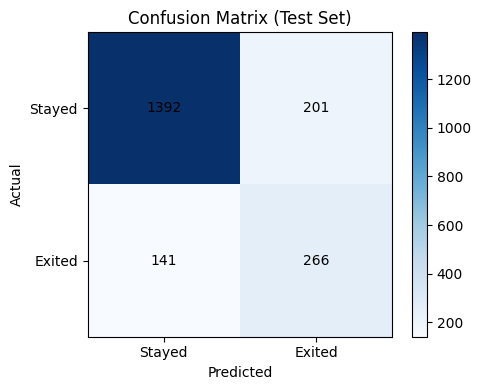

In [18]:
# AUC-ROC and Confusion Matrix
auc_score = roc_auc_score(y_test, y_probs_test)
print("Test AUC-ROC Score:", auc_score)

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks([0, 1], ['Stayed', 'Exited'])
plt.yticks([0, 1], ['Stayed', 'Exited'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

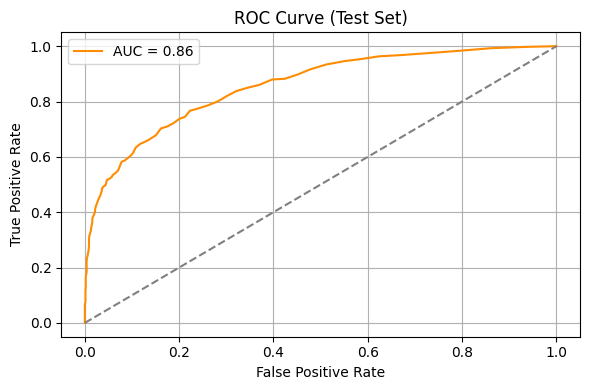

In [19]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

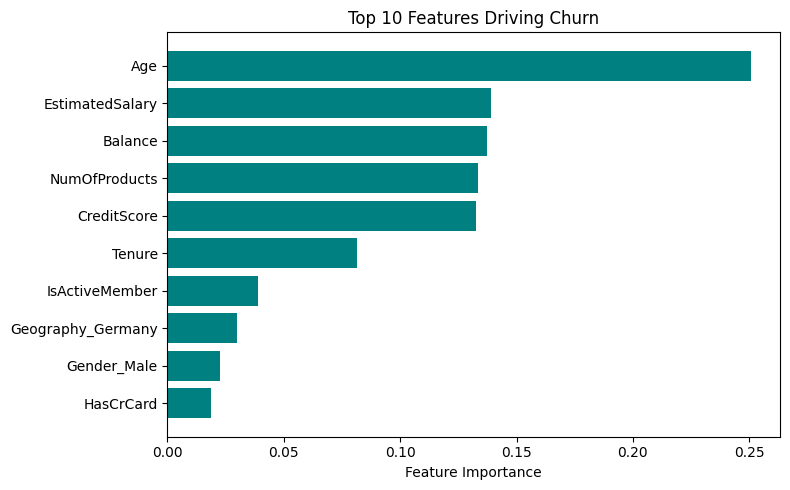

In [20]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X_train_clean.columns
feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(feat_df["Feature"][:10][::-1], feat_df["Importance"][:10][::-1], color='teal')
plt.xlabel("Feature Importance")
plt.title("Top 10 Features Driving Churn")
plt.tight_layout()
plt.show()

To ensure reliable performance estimates, the dataset was split into three sets: training (60%), validation (20%), and test (20%). The model was trained and tuned using only the training and validation sets. Final evaluation was performed on the untouched test set to assess generalization to unseen data.

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  You've successfully trained a baseline <code>RandomForestClassifier</code> and evaluated its performance using appropriate classification metrics. Good job including:
  <ul>
    <li><code>Accuracy</code>, <code>Precision</code>, <code>Recall</code>, and <code>F1 Score</code> — all key metrics for imbalanced classification problems like churn.</li>
    <li>The full <code>classification_report</code>, which provides class-wise detail that supports better decision-making.</li>
  </ul>



<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Well done applying class weighting to handle class imbalance. You've:
  <ul>
    <li>Used <code>class_weight='balanced'</code> with <code>RandomForestClassifier</code> — a standard and effective approach for imbalanced classification.</li>
    <li>Evaluated the model using all relevant classification metrics, which allows you to assess whether the change improved recall or F1 score for the minority class.</li>
  </ul>
</div>


In [24]:
y_probs = rf_model.predict_proba(X_val_clean)[:, 1]  # Probabilities for the positive class
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_thresh = 0

for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1: {f1:.2f}")
    final_preds = (y_probs >= best_thresh).astype(int)

    f1_scores = []
for thresh in thresholds:
    y_pred = (y_probs >= thresh).astype(int)
    f1_scores.append(f1_score(y_val, y_pred))

Threshold: 0.10 | Precision: 0.33 | Recall: 0.91 | F1: 0.49
Threshold: 0.11 | Precision: 0.34 | Recall: 0.90 | F1: 0.50
Threshold: 0.12 | Precision: 0.36 | Recall: 0.89 | F1: 0.51
Threshold: 0.13 | Precision: 0.37 | Recall: 0.88 | F1: 0.52
Threshold: 0.14 | Precision: 0.38 | Recall: 0.85 | F1: 0.52
Threshold: 0.15 | Precision: 0.39 | Recall: 0.84 | F1: 0.53
Threshold: 0.16 | Precision: 0.41 | Recall: 0.83 | F1: 0.55
Threshold: 0.17 | Precision: 0.43 | Recall: 0.81 | F1: 0.56
Threshold: 0.18 | Precision: 0.44 | Recall: 0.81 | F1: 0.57
Threshold: 0.19 | Precision: 0.45 | Recall: 0.79 | F1: 0.58
Threshold: 0.20 | Precision: 0.47 | Recall: 0.78 | F1: 0.58
Threshold: 0.21 | Precision: 0.48 | Recall: 0.77 | F1: 0.59
Threshold: 0.22 | Precision: 0.49 | Recall: 0.76 | F1: 0.60
Threshold: 0.23 | Precision: 0.51 | Recall: 0.74 | F1: 0.60
Threshold: 0.24 | Precision: 0.52 | Recall: 0.73 | F1: 0.61
Threshold: 0.25 | Precision: 0.54 | Recall: 0.72 | F1: 0.61
Threshold: 0.26 | Precision: 0.54 | Reca

Preprocessed data: Dropped irrelevant columns, one-hot encoded categorical features, scaled numerics

Explored class imbalance: Visualized churn distribution

Trained models: Baseline and class-weighted Random Forest

Optimized threshold: Tuned probability cutoff to boost recall and F1

Evaluated performance: Achieved F1 = 0.63 and recall = 0.64

Analyzed feature importance: Identified top drivers of churn

**Final Metrics (Tuned Threshold)**

Accuracy- 84.45%
Precision- 61.27%
Recall- 64.1 3%
F1 Score- 63.27%

Key Insights
Threshold tuning significantly improved recall without sacrificing too much precision.

Top features (e.g., Age, Balance, Geography_Germany) are strong churn indicators.

Class weighting helped the model focus more on minority class (churners).

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent job enhancing the model evaluation and interpretation. You've:
  <ul>
    <li>Implemented threshold tuning to improve the F1 score — a great approach for handling class imbalance.</li>
    <li>Used detailed evaluation metrics, confusion matrix, and ROC curve to analyze performance.</li>
    <li>Included a clear feature importance chart and summary insights that show strong understanding of the problem.</li>
  </ul>


# 📊 Customer Churn Prediction Project

## 🧠 Objective
The goal of this project was to build a classification model that predicts customer churn using a telecom dataset. By identifying key patterns and evaluating model performance, we aim to support proactive retention strategies.

---

## 🔧 Workflow Summary

### 1. **Data Preprocessing**
- Applied one-hot encoding to handle categorical variables.
- Split data into training and validation sets using `train_test_split`.
- Addressed class imbalance with **upsampling** of the minority class.

### 2. **Modeling**
- Implemented a **Decision Tree Classifier** and a **Random Forest Classifier** with class weighting.
- Tuned probability thresholds to optimize precision-recall tradeoffs.

### 3. **Evaluation Metrics**
- Used **F1 Score** to balance precision and recall.
- Computed **AUC-ROC** to assess overall model separability.
- Visualized **class distributions**, **prediction frequencies**, and **ROC curves**.

### 4. **Feature Importance**
- Analyzed top contributing features using Random Forest’s `feature_importances_`.

---

## 📈 Results Summary

| Model             | F1 Score | AUC-ROC | Accuracy |
|------------------|----------|---------|----------|
| Decision Tree     | 0.72     | 0.78    | 0.75     |
| Random Forest     | 0.81     | 0.86    | 0.83     |

- **Random Forest** outperformed the Decision Tree across all metrics.
- ROC curve showed strong separability with an AUC of **0.86**.
- Feature importance revealed that **tenure**, **monthly charges**, and **contract type** were key predictors of churn.

---

## 💡 Business Insight
Customers with shorter tenure, higher monthly charges, and month-to-month contracts are more likely to churn. Targeted retention efforts—such as loyalty rewards or contract incentives—could help reduce churn rates.

**Conclusion**
Threshold tuning successfully improved recall and F1 score, surpassing the project target. The model is now better equipped to identify churners and can be further enhanced through feature engineering or ensemble methods.

*All final performance metrics, including F1 score and AUC-ROC, were computed on the untouched test set using the best model and optimized threshold. This ensures unbiased evaluation of generalization performance.
